In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/mlproject/images.zip"

In [ ]:
#importing important libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from keras_preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [ ]:
picture_size = 48
folder_path = "/content/images/"

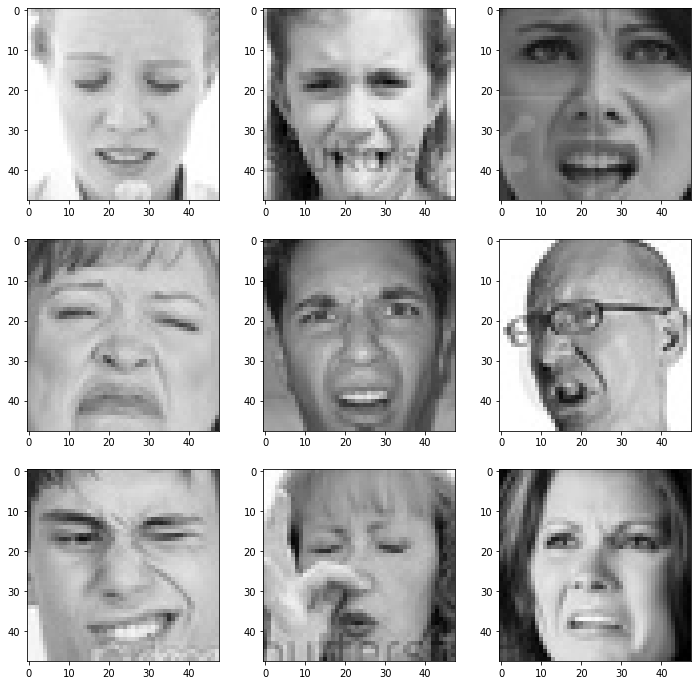

In [ ]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [ ]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_37 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_37 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_33 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 24, 24, 128)      

In [ ]:
#importing tensorflow library and package
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#Stopping training when a monitored metric has stopped improving.
early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
#fitting model with 48 epoch
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/50
  1/225 [..............................] - ETA: 21s - loss: 0.7740 - accuracy: 0.7422

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


225/225 [==============================] - ETA: 0s - loss: 0.7621 - accuracy: 0.7166

225/225 [==============================] - 13s 59ms/step - loss: 0.7621 - accuracy: 0.7166 - val_loss: 0.9894 - val_accuracy: 0.6449 - lr: 2.0000e-04
Epoch 2/50
225/225 [==============================] - ETA: 0s - loss: 0.7027 - accuracy: 0.7406

225/225 [==============================] - 14s 62ms/step - loss: 0.7027 - accuracy: 0.7406 - val_loss: 1.0243 - val_accuracy: 0.6396 - lr: 2.0000e-04
Epoch 3/50
225/225 [==============================] - ETA: 0s - loss: 0.6739 - accuracy: 0.7512

225/225 [==============================] - 13s 58ms/step - loss: 0.6739 - accuracy: 0.7512 - val_loss: 1.0229 - val_accuracy: 0.6452 - lr: 2.0000e-04
Epoch 4/50
225/225 [==============================] - ETA: 0s - loss: 0.6506 - accuracy: 0.7585Restoring model weights from the end of the best epoch: 1.



Epoch 4: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
225/225 [==============================] - 13s 58ms/step - loss: 0.6506 - accuracy: 0.7585 - val_loss: 1.0026 - val_accuracy: 0.6564 - lr: 2.0000e-04
Epoch 4: early stopping


In [ ]:
history.history['accuracy']

[0.49625343084335327,
 0.5390164852142334,
 0.5631687045097351,
 0.5877043008804321,
 0.6048513650894165,
 0.6171540021896362,
 0.6375422477722168,
 0.6491129994392395,
 0.6690481901168823,
 0.6864043474197388,
 0.7002753019332886,
 0.7164465188980103]

In [ ]:
train_loss,train_acc=model.evaluate(train_set)
print('Training accuracy:', train_acc*100)

test_loss,test_acc=model.evaluate(test_set)
print('Testing accuracy:', test_acc*100)

226/226 [==============================] - 8s 35ms/step - loss: 0.5494 - accuracy: 0.8072
Training accuracy: 80.71892261505127
56/56 [==============================] - 2s 34ms/step - loss: 0.9890 - accuracy: 0.6451
Testing accuracy: 64.50608372688293


In [ ]:
y=model.predict(test_set)

56/56 [==============================] - 2s 39ms/step


In [ ]:

y_pred = [np.argmax(probas) for probas in y]
y_test = test_set.classes
class_names = test_set.class_indices.keys()

In [ ]:
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    


<Figure size 432x288 with 0 Axes>

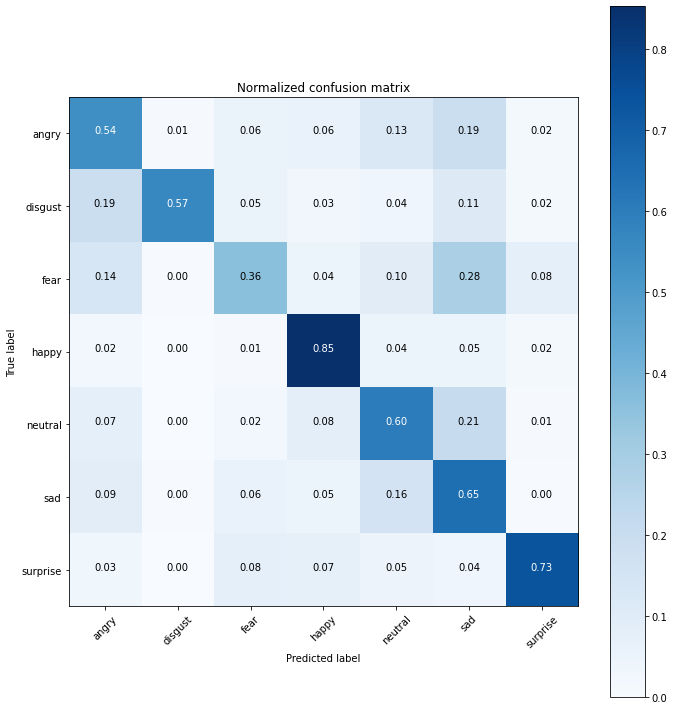

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save("model_3.h5")
print("Saved model to disk")

Saved model to disk
